In [1]:
import os

import numpy as np

from detector_testing_system.characteristic.efficiency import (
    calculate_efficiency,
    research_efficiency,
)
from detector_testing_system.device import run_device
from detector_testing_system.experiment import (
    ExperimentConfig,
    load_data,
    run_experiment,
    split_data_by_detector,
)
from detector_testing_system.output import Output
from vmk_spectrum3_wrapper.detector import Detector

In [2]:
LABEL = 'MK20050'
THRESHOLD = 40

In [3]:
config = ExperimentConfig.from_ini(
    filepath=os.path.join('.', 'ini', f'{LABEL}.ini'),
)

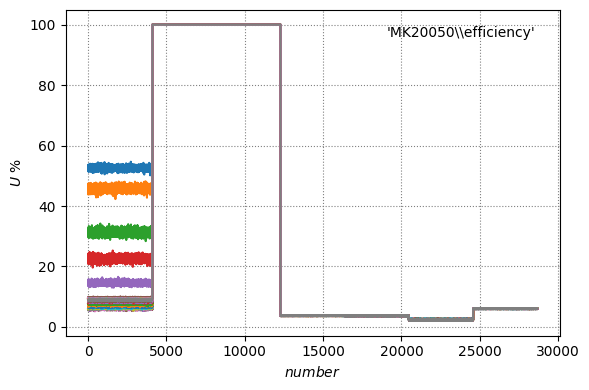

In [4]:
# device = run_device(
#     config=config,
# )
# run_experiment(
#     device=device,
#     config=config,
#     params=[
#         (1000, np.arange(2, 10, 1)),
#         (100, np.arange(10, 50, 2)),
#     ],
#     label=os.path.join(LABEL, 'efficiency'),
#     force=True,
# )

data = load_data(
    label=os.path.join(LABEL, 'efficiency'),
    show=True,
)

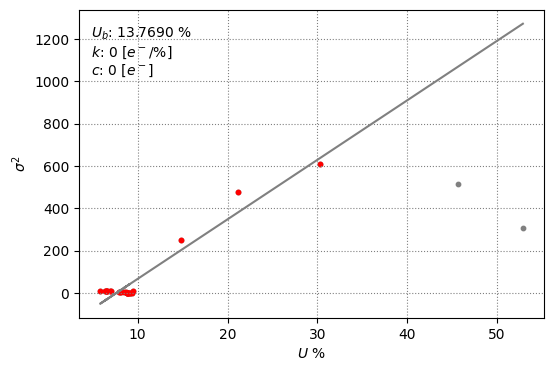

In [ ]:
capacity = calculate_efficiency(
    output=Output.create(data=data, n=1942),
    threshold=THRESHOLD,
    show=True,
)

AttributeError: module 'numpy' has no attribute 'isna'

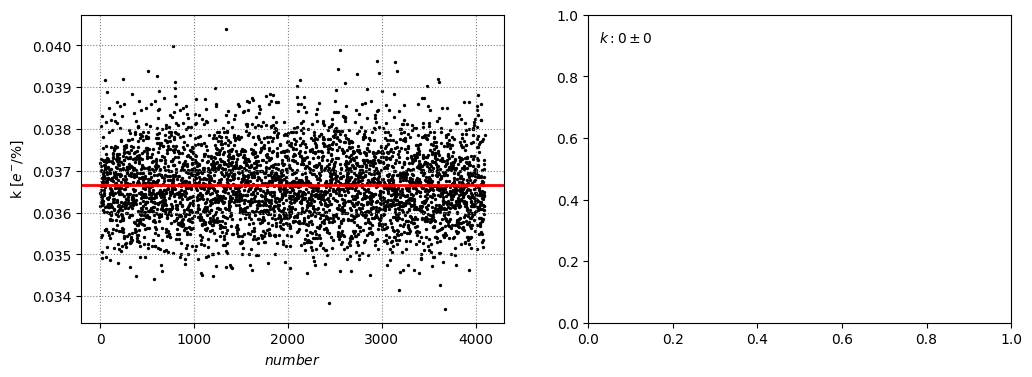

In [ ]:
for dat in split_data_by_detector(data, detector=Detector.BLPP4100):
    capacity = research_efficiency(
        dat,
        threshold=THRESHOLD,
        show=True,
        # bins=np.linspace(0, 50_000, 40),
    )